In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Reading the csv
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [71]:
# Pick the features with the most impact and use those
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
Y = df['DEATH_EVENT']

# Split into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Using the Random Forest Regression model
rt = RandomForestRegressor()
rt.fit(X_train, Y_train)

# Predicting
Y_predict_train = rt.predict(X_train)
Y_predict_test = rt.predict(X_test)

# Printing out the scores
print("Random Forest Regressor Metrics... ")
print(f"Root Mean Square Value for Training: {mean_squared_error(Y_train, Y_predict_train, squared=False)}")
print(f"Root Mean Square Value for Testing: {mean_squared_error(Y_test, Y_predict_test, squared=False)}")

Random Forest Regressor Metrics... 
Root Mean Square Value for Training: 0.12709993432507874
Root Mean Square Value for Testing: 0.41196884995510685


### Example of the first 4 decision trees created by the Random Forest Regression model

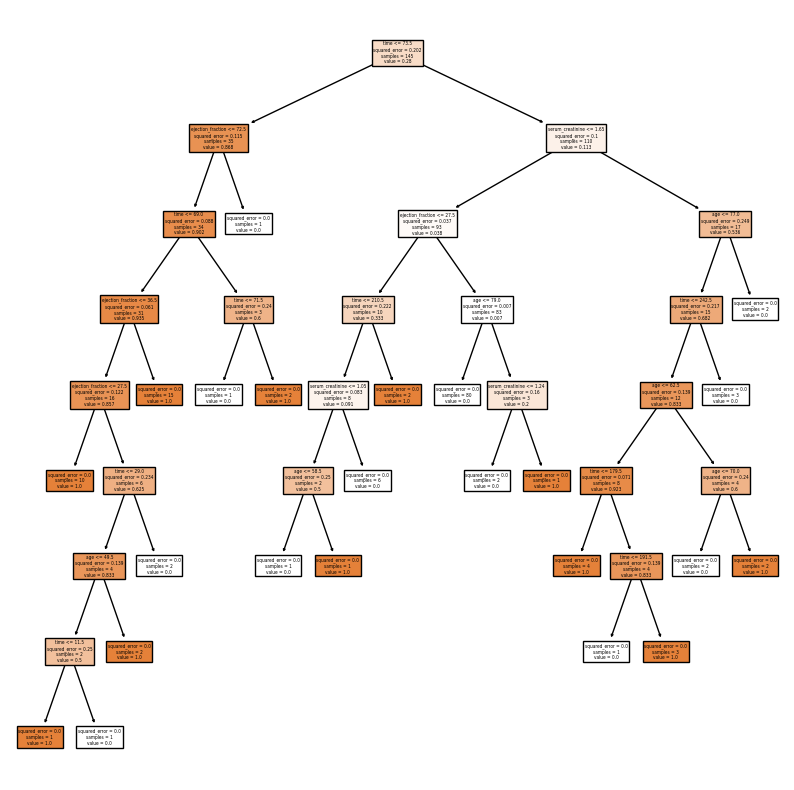

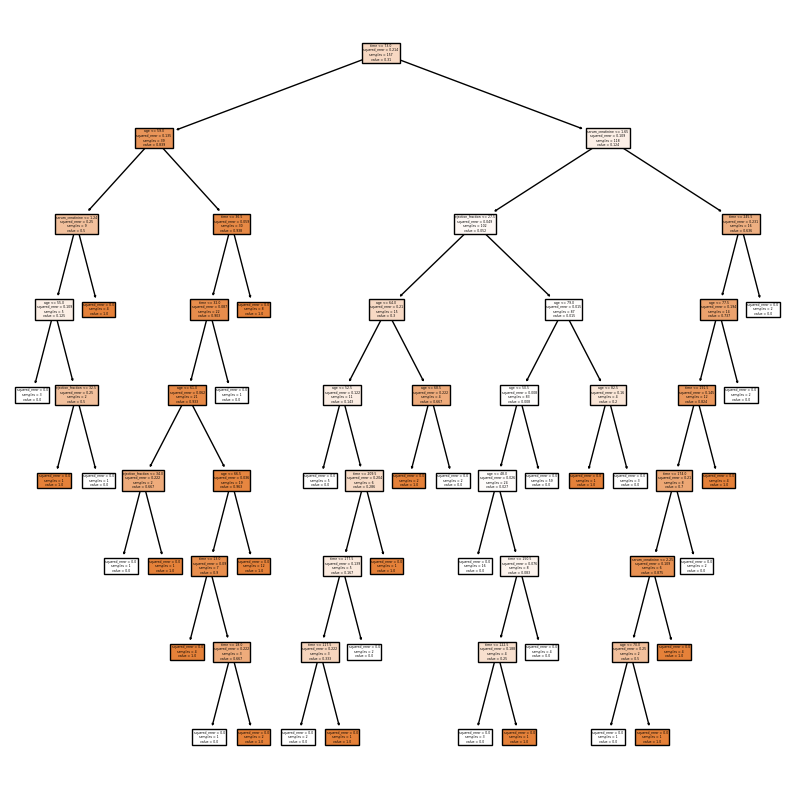

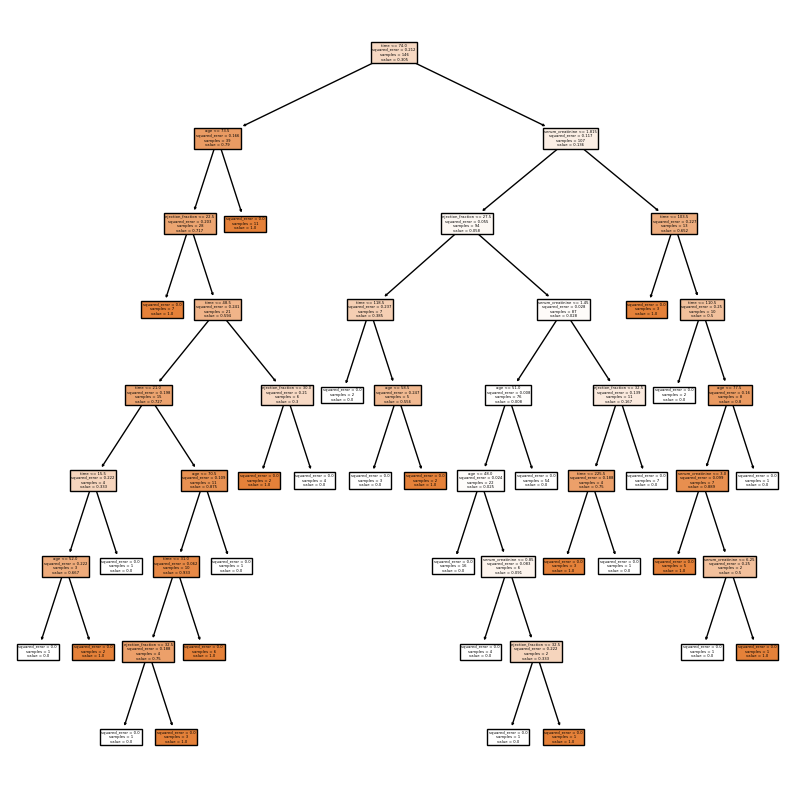

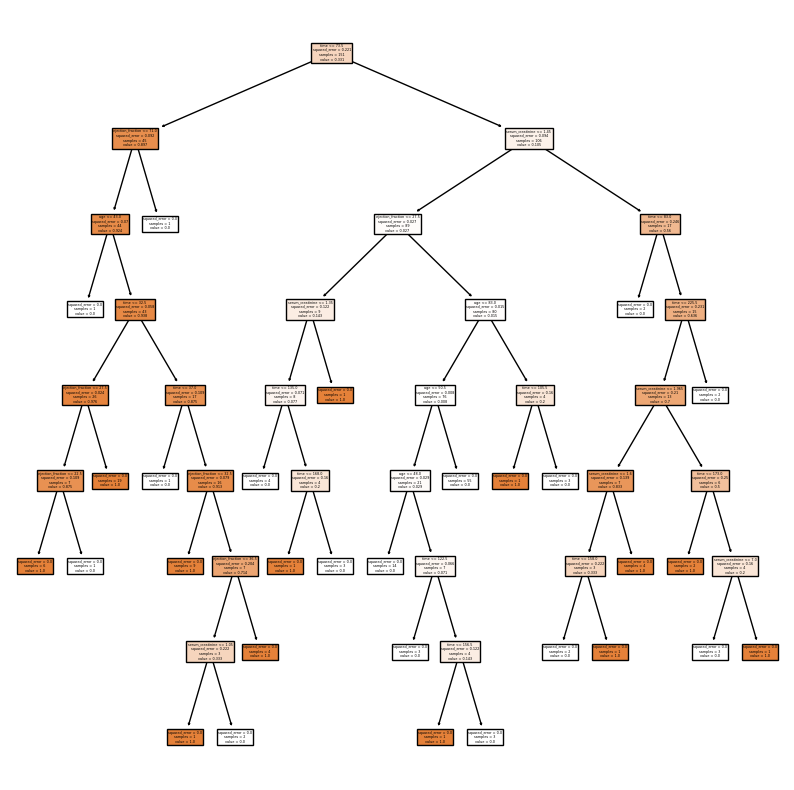

In [72]:
len(rt.estimators_)
for i in range(0, 4):
    plt.figure(figsize=(10,10))
    _ = tree.plot_tree(rt.estimators_[i], feature_names=['age', 'ejection_fraction', 'serum_creatinine', 'time'], filled=True)
    
    